<a href="https://colab.research.google.com/github/Sibahle01/Cafe-Menu/blob/main/Superstore_Sales_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="/content/drive/MyDrive/Dataset/train.csv"
df=pd.read_csv(path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#filling null values in postal code we see that there are missing values

In [6]:
df["Postal Code"] = df["Postal Code"].fillna(0)


In [7]:
df["Postal Code"] = df["Postal Code"].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Now the issue of the Postal Code is solved

In [ ]:
# Checking Duplicates

In [9]:
if df.duplicated().sum() > 0:
  print("Duplicate Exists")
else:
  print("Duplicate don't Exists")


Duplicate don't Exists


In [10]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
# Customer Segmentation (Customer type) Who the main buyers?

In [11]:
types_of_customers = df["Segment"].unique()
print (types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [15]:
number_of_customers = df["Segment"].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={"Segment": "Types Of Customers"})


In [16]:
print (number_of_customers)

  Types Of Customers  count
0           Consumer   5101
1          Corporate   2953
2        Home Office   1746


In [ ]:
# Now its time to plot the pie chart to visualise the difference in customers

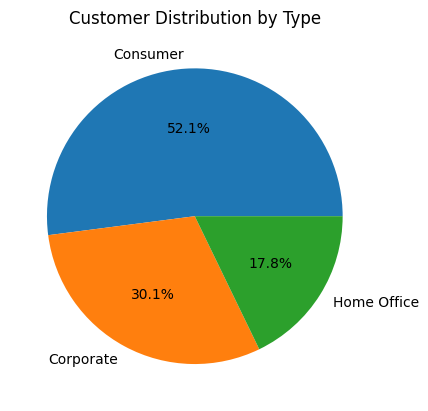

In [28]:
plt.pie(
    number_of_customers['count'],
    labels=number_of_customers['Types Of Customers'],
    autopct='%1.1f%%'
)
plt.title("Customer Distribution by Type")
plt.show()

In [29]:
# How to balance resource allocation for all three segments to maximize growth
# Plot a Bar graph for a number of sales for each segment

  Type of customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


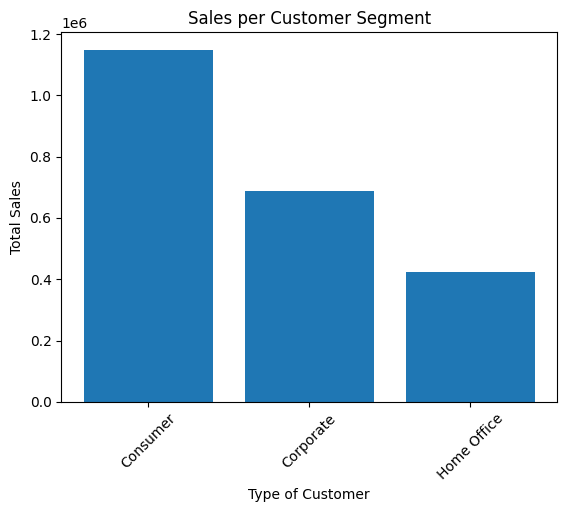

In [34]:
sales_per_segment = df.groupby('Segment')["Sales"].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={"Segment": "Type of customer", "Sales": 'Total Sales'})

print(sales_per_segment)
plt.bar(sales_per_segment["Type of customer"], sales_per_segment["Total Sales"])
plt.xlabel("Type of Customer")
plt.ylabel("Total Sales")
plt.title("Sales per Customer Segment")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [35]:
#This bar chart shows the distrubation of sales betweeen customer segments
#Calculate the CLTV of each segment to identify which segment generate the most revenue over time
#\(CLTV=(CustomerValue*AverageCustomerLifespan)\) help us on our focus. Understand certification level

In [ ]:
# Customer loyalty. Make sure the most loyal are happy eg. Rewards like discounts or hand written latters"Thank you"

In [36]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [38]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' :  'Total Orders'}, inplace = True)
repeat_customers =customers_order_frequency[customers_order_frequency['Total Orders'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending = False)
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


In [ ]:
# This is the list of top customrs and this can help us in the amont of orders to place. Home Officers shows there is portential there we can make effort to get mor customers in Home Officers

In [41]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment' ])['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='Sales',ascending=False)
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [ ]:
# Now we look at shipping(Sgipping method). Which is most reliable?

In [44]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index': 'Use Frequency', 'Ship Mode':'Mode Of Shipment'})
print(shipping_model)

  Mode Of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


In [ ]:
# Standard Class is the most popular. Peaple will choose whats most popular and will one can inverst on it more then the other shippment methods

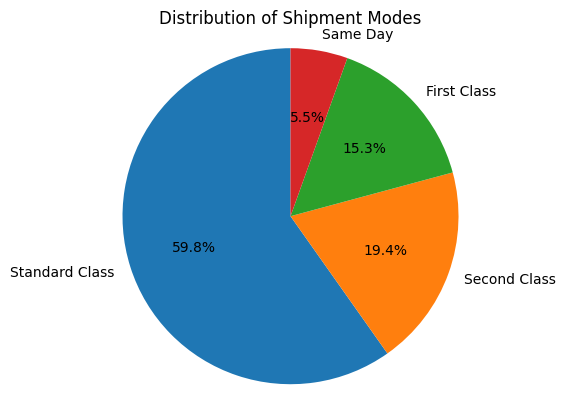

In [45]:
plt.pie(
    shipping_model['count'],
    labels=shipping_model['Mode Of Shipment'],
    autopct='%1.1f%%',
    startangle=90
)

# Adding a title
plt.title("Distribution of Shipment Modes")
plt.axis('equal')
plt.show()

In [46]:
# Geographic Analysis. Which City performs the best and Which Perfoms the least

In [48]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'State':'Number of Customers'})
print(state.head(20))

   Number of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


In [49]:
# The most popular is California and New Jersey is the least there for we can focus more on New Jersey

In [52]:
city = df['City'].value_counts().reset_index()
print(city.head(25))


             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82
15       Columbia     81
16       Richmond     81
17         Aurora     68
18        Phoenix     63
19      Arlington     60
20    San Antonio     59
21          Miami     56
22     Louisville     54
23      Rochester     53
24     Long Beach     52


In [53]:
#Top perfoming Products

In [54]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [56]:
df.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2018-109484,06/11/2018,12/11/2018,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820
96,97,CA-2018-161018,09/11/2018,11/11/2018,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300
97,98,CA-2018-157833,17/06/2018,20/06/2018,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120
98,99,CA-2017-149223,06/09/2017,11/09/2017,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800


In [59]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [60]:
 subcategory_count = df.groupby("Category")['Sub-Category'].nunique().reset_index()
 subcategory_count =subcategory_count.sort_values(by='Sub-Category', ascending= False)
 print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
# What are the most perfoming Subcategory

In [61]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = False)

In [62]:
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [63]:
#The most porpuler ssubcategory is phones under Technology. Therefor there could be a larger technology department for phones

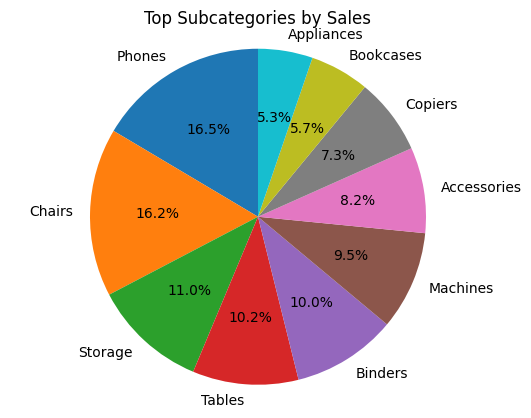

In [66]:
top_subcategories = subcategory_count_sales.head(10)

# Plotting the pie chart
plt.pie(
    top_subcategories['Sales'],  # Values for the pie chart (sales)
    labels=top_subcategories['Sub-Category'],  # Labels (subcategories)
    autopct='%1.1f%%',  # Display percentage
    startangle=90  # Rotate the chart for better visual alignment
)

# Adding a title
plt.title("Top Subcategories by Sales")
plt.axis('equal')  # Equal aspect ratio to make the pie chart circular
plt.show()

<BarContainer object of 17 artists>

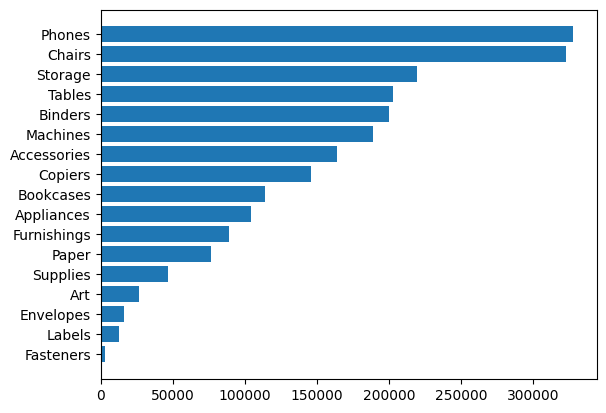

In [67]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = True)
plt.barh(subcategory_count_sales["Sub-Category"], subcategory_count_sales['Sales'])

In [ ]:
# Therefore more investment in marketing in Phones and Chairs. In the future buy less Art or change the art
# Crack to change(problem,finances,new technology)

In [68]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year', 'Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


In [ ]:
  #Lets represent this in a bar graph

<BarContainer object of 4 artists>

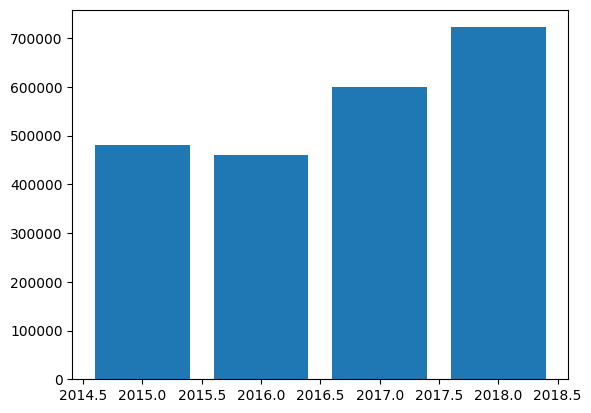

In [69]:
plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

In [70]:
#There is steady growth from 2014 to 2018 due to different fectors like economic growth or business progresss
#We can represent this in a plotted graph as well

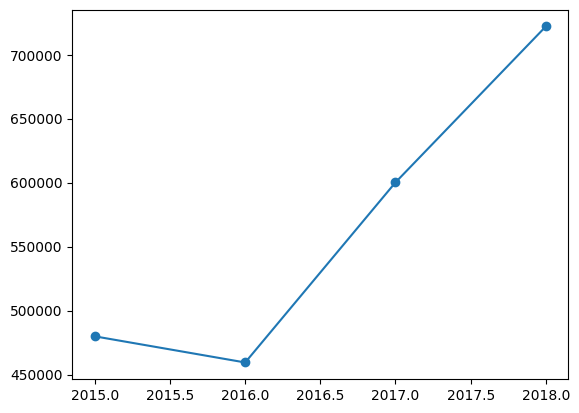

In [72]:
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'], marker ='o', linestyle='-')

In [ ]:
#Mapping high to low. If a company wants to move to other contries

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Initialize Plotly in Jupyter notebook mode
import plotly.io as pio

# create a mapping for all 50 states
all_state_mapping = {
"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
"California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
"Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
"Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
"Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
"Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
"New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
"North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
"Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
"South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
"Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
# Add the Abbreviation column to the dataframe
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))
fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

In [ ]:
#Yello means the most amount of sales while the blue means low. CA has the highest

In [78]:
import plotly.express as px

In [80]:
# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create a nested pie chart
fig = px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales')  # Use 'Sales' instead of 'sales'
fig.show()